In [ ]:
# Loan Risk Analysis Project  
### Part 1: Data Cleaning & Feature Engineering
#This notebook is part of an ongoing credit risk project.

In [26]:
## Objective

#The goal of this phase is to clean, preprocess and transform raw loan data
#into a structured dataset suitable for credit risk analysis.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
loan_data_back_up = pd.read_csv(r'C:\Users\User01\Desktop\Νέος φάκελος (20)\loan_data_2007_2014.csv',low_memory = False) 

In [3]:
loan_data = loan_data_back_up.copy()

In [4]:
pd.options.display.max_columns = None

In [5]:
loan_data['emp_length_int'] = (
    loan_data['emp_length']
    .str.replace('<1year', '0',  regex = False)
    .str.extract('(\d+)')
    .astype(float)
)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User01\AppData\Local\Temp\ipykernel_16756\2917367719.py:4: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


In [6]:
loan_data['term_int'] = (
    loan_data['term']
    .str.extract('(\d+)')
    .astype(float)
)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User01\AppData\Local\Temp\ipykernel_16756\3747082902.py:3: SyntaxWarning: invalid escape sequence '\d'
  .str.extract('(\d+)')


In [7]:
loan_data['term_int']

0         36.0
1         60.0
2         36.0
3         36.0
4         60.0
          ... 
466280    60.0
466281    60.0
466282    60.0
466283    36.0
466284    36.0
Name: term_int, Length: 466285, dtype: float64

In [8]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [9]:
loan_data['mths_since_earliest_cr_line'] = (
    (pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']).dt.days / 30
).round()

In [10]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.979220
std          95.344015
min        -621.000000
25%         186.000000
50%         228.000000
75%         289.000000
max         596.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [11]:
loan_data.loc[:, ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-545.0
1770,Sep-68,2068-09-01,-618.0
2799,Sep-64,2064-09-01,-569.0
3282,Sep-67,2067-09-01,-606.0
3359,Feb-65,2065-02-01,-574.0
...,...,...,...
464003,Jan-68,2068-01-01,-610.0
464260,Jul-66,2066-07-01,-591.0
465100,Oct-67,2067-10-01,-607.0
465500,Sep-67,2067-09-01,-606.0


In [12]:
mask = loan_data['earliest_cr_line_date'] > pd.Timestamp.today()

loan_data.loc[mask, 'earliest_cr_line_date'] = (
loan_data.loc[mask, 'earliest_cr_line_date'] - pd.DateOffset(years=100)
)

In [13]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [14]:
loan_data['issue_d']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, Length: 466285, dtype: datetime64[ns]

In [15]:
loan_data['moths_since_issue_d'] = (
    (pd.to_datetime('2017-12-01') - loan_data['issue_d']).dt.days/30
)

In [16]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'],prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'],prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'],prefix = 'verification_status', prefix_sep = ':'),               
                     pd.get_dummies(loan_data['loan_status'],prefix = 'loan_status', prefix_sep = ':'),               
                     pd.get_dummies(loan_data['purpose'],prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'],prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ':'),]

In [17]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [18]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis = 1)

In [19]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,moths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [20]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [21]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

C:\Users\User01\AppData\Local\Temp\ipykernel_16756\729504533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)


In [22]:
loan_data['annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean())
loan_data['mths_since_earliest_cr_line'] = loan_data['mths_since_earliest_cr_line'].fillna(0)
loan_data['acc_now_delinq'] = loan_data['acc_now_delinq'].fillna(0)
loan_data['total_acc'] = loan_data['total_acc'].fillna(0)
loan_data['pub_rec'] = loan_data['pub_rec'].fillna(0)
loan_data['open_acc'] = loan_data['open_acc'].fillna(0)
loan_data['inq_last_6mths'] = loan_data['inq_last_6mths'].fillna(0)
loan_data['delinq_2yrs'] = loan_data['delinq_2yrs'].fillna(0)
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(0)

In [23]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [24]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (16-30 days)']),0,1)

In [25]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [26]:
df_inputs_prepr = loan_data_inputs_train 
df_targets_prepr = loan_data_targets_train

In [27]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [28]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,1
36159,C,0


In [29]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [30]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.964775
1,B,0.929199
2,C,0.899426
3,D,0.864272
4,E,0.826821
5,F,0.776923
6,G,0.754333


In [31]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [32]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.964775
1,B,109730,B,0.929199
2,C,100245,C,0.899426
3,D,61498,D,0.864272
4,E,28612,E,0.826821
5,F,10530,F,0.776923
6,G,2654,G,0.754333


In [33]:
df1 = df1.iloc[: , [0,1,3]]

In [34]:
df1

,grade,good_bad,good_bad
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [35]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.964775
1,B,109730,0.929199
2,C,100245,0.899426
3,D,61498,0.864272
4,E,28612,0.826821
5,F,10530,0.776923
6,G,2654,0.754333


In [36]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [37]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.964775,0.160200
1,B,109730,0.929199,0.294160
2,C,100245,0.899426,0.268733
3,D,61498,0.864272,0.164862
4,E,28612,0.826821,0.076702
5,F,10530,0.776923,0.028228
6,G,2654,0.754333,0.007115


In [38]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs']/ df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 -df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/ df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [39]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y)
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [40]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,G,2654,0.754333,0.007115,2002.0,652.0,0.005945,0.017982,-1.106852,NaN,NaN,0.277898
1,F,10530,0.776923,0.028228,8181.0,2349.0,0.024293,0.064784,-0.980885,0.022590,0.125967,0.277898
2,E,28612,0.826821,0.076702,23657.0,4955.0,0.070247,0.136656,-0.665448,0.049898,0.315437,0.277898
3,D,61498,0.864272,0.164862,53151.0,8347.0,0.157826,0.230205,-0.377475,0.037451,0.287973,0.277898
4,C,100245,0.899426,0.268733,90163.0,10082.0,0.267730,0.278055,-0.037842,0.035154,0.339633,0.277898
5,B,109730,0.929199,0.294160,101961.0,7769.0,0.302762,0.214264,0.345739,0.029773,0.383581,0.277898
6,A,59759,0.964775,0.160200,57654.0,2105.0,0.171197,0.058055,1.081435,0.035576,0.735695,0.277898


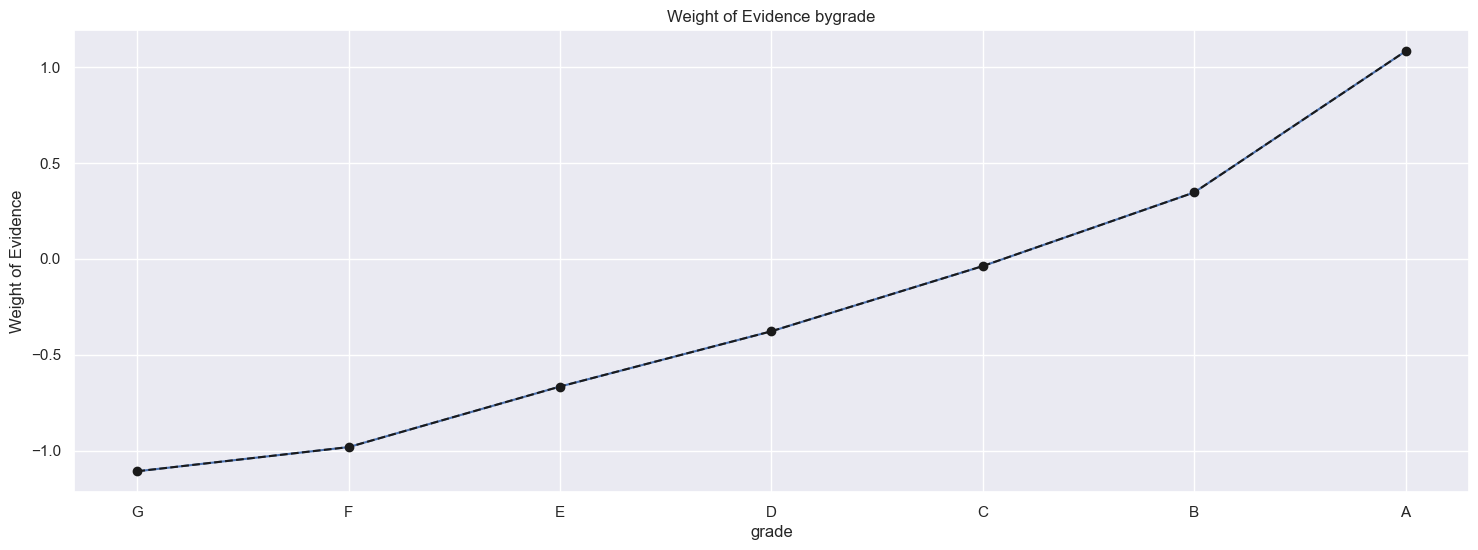

In [41]:
plot_by_woe(df_temp)

In [42]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000324,0.000772,-0.869566,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000101,0.000165,-0.494109,0.054380,0.375458,inf
2,RENT,150599,0.887722,0.403720,133690.0,16909.0,0.396978,0.466339,-0.161032,0.037722,0.333077,inf
3,OWN,33295,0.905181,0.089256,30138.0,3157.0,0.089492,0.087068,0.027455,0.017459,0.188487,inf
4,MORTGAGE,188956,0.914483,0.506546,172797.0,16159.0,0.513102,0.445655,0.140931,0.009302,0.113476,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.085517,inf,inf


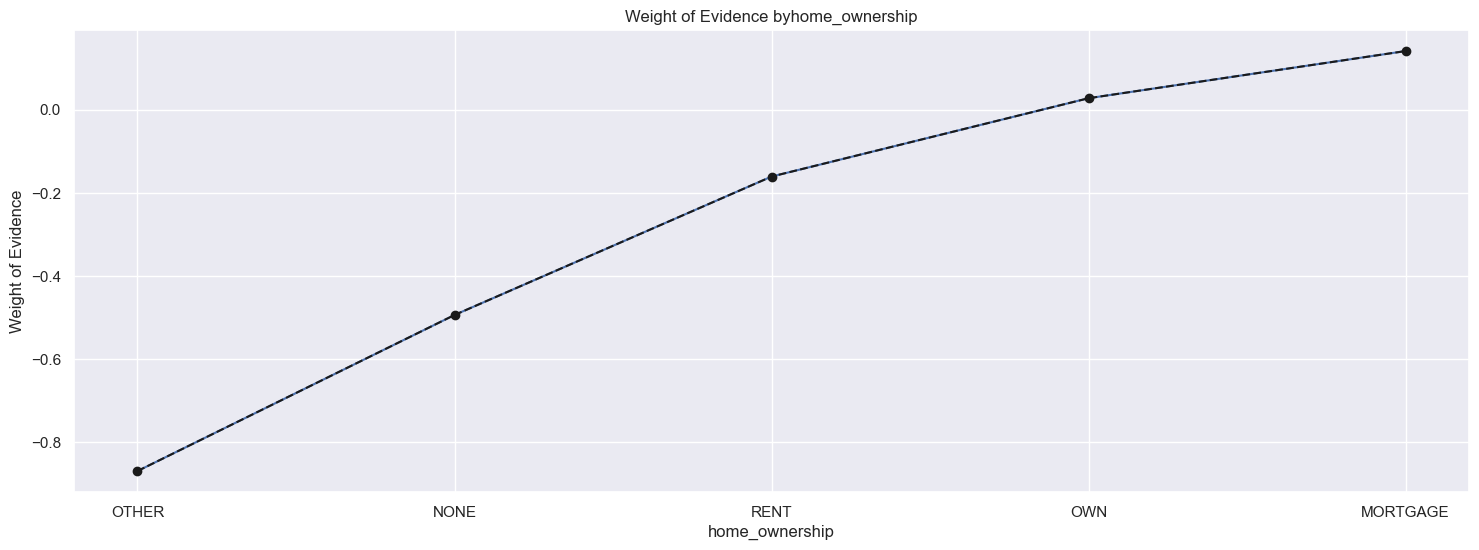

In [43]:
plot_by_woe(df_temp)

In [44]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [45]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000193,-2.382860,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000083,-1.024737,0.307692,1.358123,inf
2,NV,5221,0.880483,0.013996,4597.0,624.0,0.013650,0.017210,-0.231701,0.111252,0.793036,inf
3,FL,25211,0.889215,0.067585,22418.0,2793.0,0.066568,0.077029,-0.145962,0.008732,0.085739,inf
4,AL,4671,0.890387,0.012522,4159.0,512.0,0.012350,0.014121,-0.134004,0.001172,0.011957,inf
5,NM,2075,0.892530,0.005563,1852.0,223.0,0.005499,0.006150,-0.111860,0.002143,0.022144,inf
6,HI,2001,0.894553,0.005364,1790.0,211.0,0.005315,0.005819,-0.090597,0.002023,0.021263,inf
7,MO,6017,0.894632,0.016130,5383.0,634.0,0.015984,0.017485,-0.089757,0.000079,0.000839,inf
8,CA,57199,0.896432,0.153337,51275.0,5924.0,0.152256,0.163380,-0.070518,0.001800,0.019239,inf
9,KY,3587,0.896850,0.009616,3217.0,370.0,0.009553,0.010204,-0.066008,0.000418,0.004510,inf


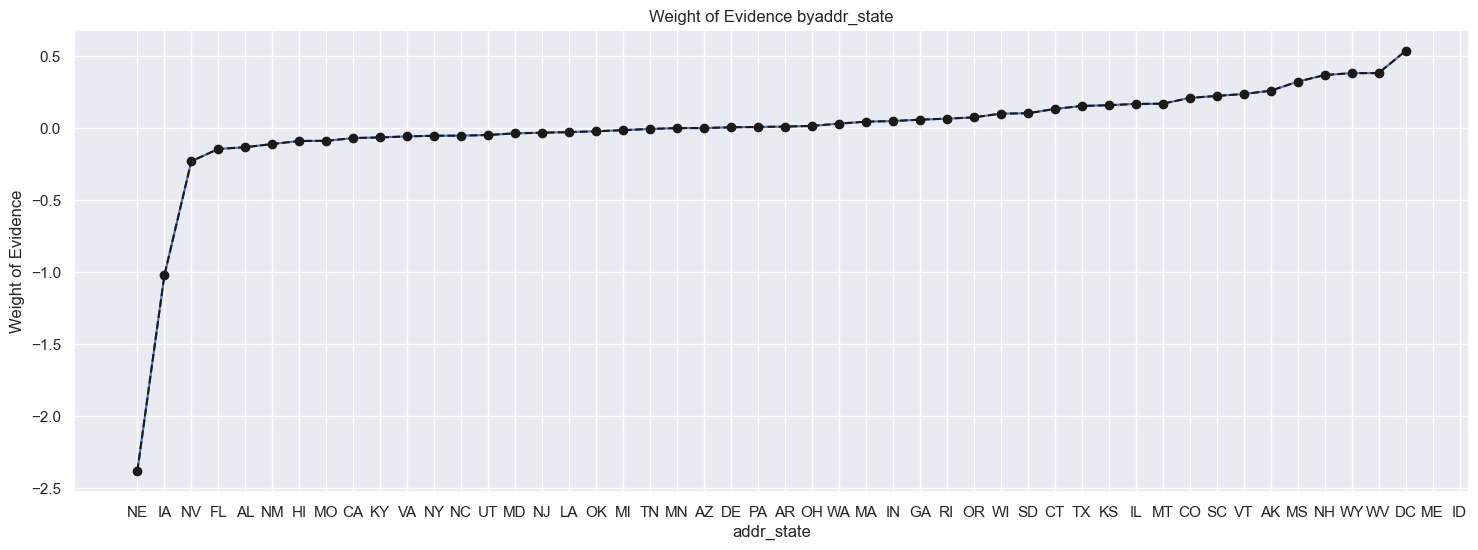

In [46]:
plot_by_woe(df_temp)

In [47]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0 

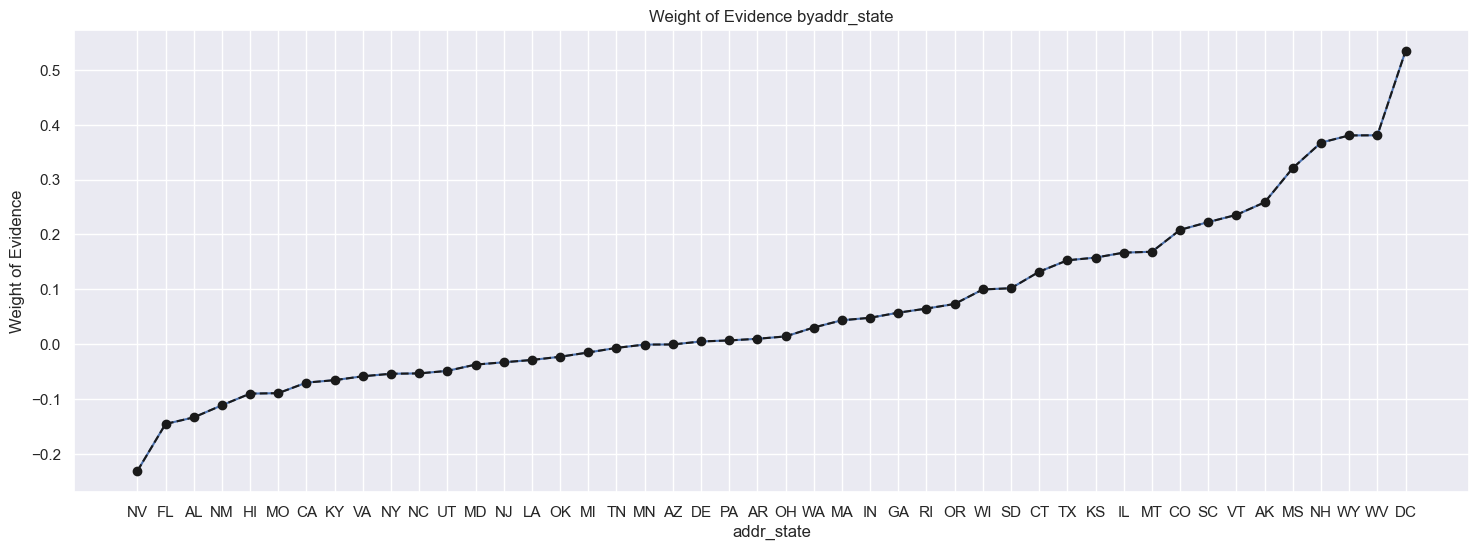

In [48]:
plot_by_woe(df_temp.iloc[2: -2,:])

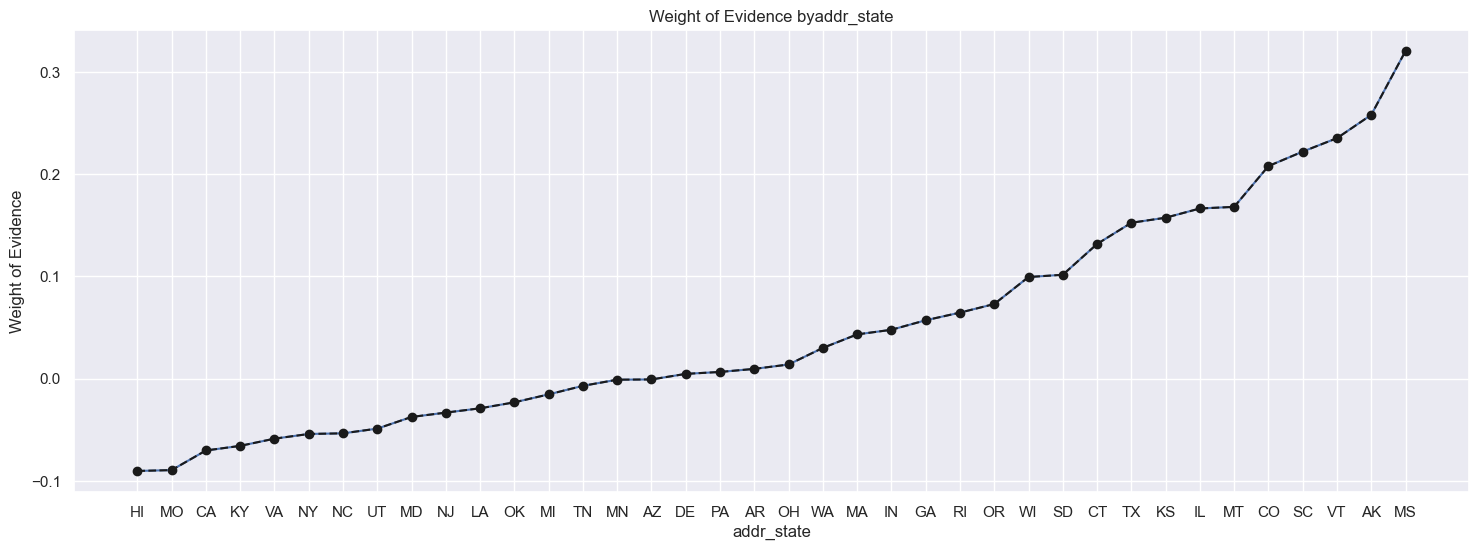

In [49]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [50]:
df_inputs_prepr.loc[:, 'addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([
    df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
    df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
    df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
    df_inputs_prepr['addr_state:AL']
])

# Άθροισμα NM και VA
df_inputs_prepr.loc[:, 'addr_state:NM_VA'] = sum([
    df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']
])

# Άθροισμα OK, TN, MO, LA, MD, NC
df_inputs_prepr.loc[:, 'addr_state:OK_TN_MO_LA_MD_NC'] = sum([
    df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
    df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
    df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']
])

# Άθροισμα UT, KY, AZ, NJ
df_inputs_prepr.loc[:, 'addr_state:UT_KY_AZ_NJ'] = sum([
    df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
    df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']
])

# Άθροισμα AR, MI, PA, OH, MN
df_inputs_prepr.loc[:, 'addr_state:AR_MI_PA_OH_MN'] = sum([
    df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
    df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
    df_inputs_prepr['addr_state:MN']
])

# Άθροισμα GA, WA, OR
df_inputs_prepr.loc[:, 'addr_state:GA_WA_OR'] = sum([
    df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
    df_inputs_prepr['addr_state:OR']
])

# Άθροισμα WI, MT
df_inputs_prepr.loc[:, 'addr_state:WI_MT'] = sum([
    df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']
])

# Άθροισμα IL, CT
df_inputs_prepr.loc[:, 'addr_state:IL_CT'] = sum([
    df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']
])

# Άθροισμα KS, SC, CO, VT, AK, MS
df_inputs_prepr.loc[:, 'addr_state:KS_SC_CO_VT_AK_MS'] = sum([
    df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
    df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
    df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']
])

# Άθροισμα MV, NH, WY, DC, ME, ID
df_inputs_prepr.loc[:, 'addr_state:WV_NH_WY_DC_ME_ID'] = sum([
    df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
    df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
    df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']
])

In [51]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,Verified,134414,0.885086,0.360332,118968.0,15446.0,0.353263,0.425991,-0.187205,NaN,NaN,0.02279
1,Source Verified,120030,0.910514,0.321772,109289.0,10741.0,0.324522,0.296230,0.091218,0.025428,0.278423,0.02279
2,Not Verified,118584,0.915064,0.317896,108512.0,10072.0,0.322215,0.277779,0.148392,0.004550,0.057174,0.02279


In [52]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,small_business,5582,0.795951,0.014964,4443.0,1139.0,0.013193,0.031413,-0.867530,NaN,NaN,0.041638
1,educational,333,0.801802,0.000893,267.0,66.0,0.000793,0.001820,-0.831116,0.005851,0.036415,0.041638
2,moving,2392,0.852425,0.006412,2039.0,353.0,0.006055,0.009736,-0.474963,0.050623,0.356153,0.041638
3,renewable_energy,281,0.871886,0.000753,245.0,36.0,0.000728,0.000993,-0.310970,0.019461,0.163993,0.041638
4,other,18884,0.873279,0.050624,16491.0,2393.0,0.048968,0.065997,-0.298443,0.001393,0.012528,0.041638
5,house,1830,0.873770,0.004906,1599.0,231.0,0.004748,0.006371,-0.293994,0.000492,0.004449,0.041638
6,medical,3684,0.881650,0.009876,3248.0,436.0,0.009645,0.012025,-0.220557,0.007880,0.073436,0.041638
7,wedding,1887,0.882883,0.005059,1666.0,221.0,0.004947,0.006095,-0.208691,0.001233,0.011866,0.041638
8,vacation,1991,0.890005,0.005337,1772.0,219.0,0.005262,0.006040,-0.137917,0.007122,0.070774,0.041638
9,debt_consolidation,219183,0.899997,0.587578,197264.0,21919.0,0.585755,0.604512,-0.031521,0.009992,0.106397,0.041638


In [53]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_good,diff_WoE,IV
0,f,242514,0.890213,0.650123,215889.0,26625.0,0.64106,0.7343,-0.135796,NaN,NaN,0.040708
1,w,130514,0.926184,0.349877,120880.0,9634.0,0.35894,0.2657,0.300790,0.035972,0.436586,0.040708
